# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
# page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
page = requests.get(url)
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
main_website_url = 'https://www.justwatch.com'

# find all a tags
movies_link = soup.find_all('a', class_='title-list-grid__item--link')[0:50]
list_of_movies_links = []
for link in movies_link:
  movie_url = link.get('href')
  list_of_movies_links.append(main_website_url + movie_url)
print(list_of_movies_links)


['https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/laapataa-ladies', 'https://www.justwatch.com/in/movie/the-crew-2024', 'https://www.justwatch.com/in/movie/manjummel-boys', 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire', 'https://www.justwatch.com/in/movie/godzilla-minus-one', 'https://www.justwatch.com/in/movie/madgaon-express', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/mad-max-fury-road', 'https://www.justwatch.com/in/movie/hereditary', 'https://www.justwatch.com/in/movie/black-magic-2024', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/maidaan', 'https://www.justwatch.com/in/movie/premalu', 'https://www.justwatch.com/in/movie/kung-fu-panda-4', 'https://www.justwatch.com/in/movie/bade-miyan-chote-miyan-2023', 'https://www.justwatch.com/in/movie/zara-hatke-zara-bach-ke', 'https://www.justwatch.com/in/movie/oppenheimer', 'https://www.justwatch

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
list_of_movie_soups = []
for x in list_of_movies_links:
  url_from_list = x
  page = requests.get(url_from_list)
  soup = BeautifulSoup(page.text, 'html.parser')
  list_of_movie_soups.append(soup)
  # Adding a 2 second pause to avoid getting Too many requests Error
  time.sleep(2)

In [ ]:
list_of_movies_title = []
# Iterating through each movie soup
for soup in list_of_movie_soups:
  movie_title = soup.find('h1')
  if movie_title:
    list_of_movies_title.append(movie_title.text.strip()[:-8])
  else:
    list_of_movies_title.append(f"N/A")
print(list_of_movies_title)

['', 'Laapata', '', 'Manjum', 'Godzilla x Kong: The Ne', 'Godzilla M', 'Madgaon', 'Fam', 'Mad Max: F', 'He', '', 'Dune: ', '', '', 'Kung Fu', 'Bade Miyan Cho', 'Zara Hatke Zar', 'Opp', '', 'Swatantrya Veer ', 'The ', 'The Gangster, the Cop, t', '', '', 'Aquaman and the Lost', 'Art', '', 'The Fi', 'Cha', 'Ma', 'Teri Baaton Mein Aisa Ul', 'Rise of the Planet of ', 'Anyone', 'Kingdom of the Planet of ', '', '', '', '1', 'The G', '', '', 'Ara', '', 'The Ide', '', 'Harry Potter and the Philosopher', 'Mo', '', 'Varshangalkku', 'Furiosa: A Mad ']


## **Scrapping release Year**

In [ ]:
# Write Your Code here
list_of_release_years = [int(soup.find(name='span', class_='text-muted').text[2:6]) for soup in list_of_movie_soups]

print(list_of_release_years)


[2024, 2024, 2024, 2024, 2024, 2023, 2024, 2024, 2015, 2018, 2024, 2024, 2022, 2024, 2024, 2024, 2023, 2023, 2024, 2024, 2024, 2019, 2023, 2024, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2011, 2023, 2024, 2020, 2023, 2021, 2023, 2024, 2024, 2024, 2024, 2024, 2024, 2011, 2001, 2024, 2024, 2024, 2024]


## **Scrapping Genres**

In [ ]:
# Write Your Code here
list_of_genres = []

for soup in list_of_movie_soups:
  genres_heading = soup.find('h3', class_='detail-infos__subheading', string = 'Genres')

  if genres_heading:
    genres_div = genres_heading.find_next('div', class_='detail-infos__value')
    if genres_div:
      genres = genres_div.text.strip()
      list_of_genres.append(genres)
    else:
      list_of_genres.append("N/A")
  else:
    list_of_genres.append("N/A")

print(list_of_genres)

['2h 38min', '2h 2min', '1h 58min', '2h 15min', '1h 55min', '2h 5min', '2h 23min', '2h 39min', '2h 1min', '2h 8min', '2h 12min', '2h 47min', '3h 1min', '2h 36min', '1h 34min', '2h 44min', '2h 20min', '3h 0min', '2h 10min', '2h 56min', '2h 6min', '1h 49min', '2h 55min', '1h 56min', '2h 4min', '2h 38min', '2h 39min', '1h 59min', '2h 12min', '1h 56min', '2h 21min', '1h 45min', '1h 44min', '2h 25min', '1h 54min', '3h 21min', '2h 35min', '2h 27min', '2h 52min', '2h 20min', '2h 39min', '2h 28min', '1h 58min', '1h 56min', '2h 39min', '2h 32min', '2h 1min', '2h 14min', '2h 46min', '2h 28min']


## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
list_of_ratings = []

for soup in list_of_movie_soups:
  imdb_img = soup.find('img', alt=re.compile(r'IMDB'))

  if imdb_img:
    imdb_rating_span = imdb_img.find_next('span')
    imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
    list_of_ratings.append(imdb_rating)
  else:
    list_of_ratings.append("N/A")
print(list_of_ratings)


['8.0', '8.5', '5.9', '8.3', '6.2', '7.8', '7.2', '5.1', '8.1', '7.3', '6.6', '8.6', '8.1', '7.9', '6.3', '4.5', '6.1', '8.3', '5.7', '7.7', '7.0', '6.9', '6.5', '7.1', '5.6', '7.9', '7.9', '6.5', '7.3', '3.9', '6.3', '7.6', '6.1', '7.2', '3.3', '6.2', '8.0', '8.9', '8.6', '7.3', '6.7', '6.2', '5.6', '6.4', '7.7', '7.6', 'N/A', '6.9', '7.0', '7.9']


## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
list_of_runtimes = []
for soup in list_of_movie_soups:
  runtime_head = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
  if runtime_head:
    runtime_div = runtime_head.find_next('div', class_='detail-infos__value')
    runtime = runtime_div.get_text(strip=True)
    list_of_runtimes.append(runtime)
  else:
    list_of_runtimes.append("N/A")
print(list_of_runtimes)


['2h 38min', '2h 2min', '1h 58min', '2h 15min', '1h 55min', '2h 5min', '2h 23min', '2h 39min', '2h 1min', '2h 8min', '2h 12min', '2h 47min', '3h 1min', '2h 36min', '1h 34min', '2h 44min', '2h 20min', '3h 0min', '2h 10min', '2h 56min', '2h 6min', '1h 49min', '2h 55min', '1h 56min', '2h 4min', '2h 38min', '2h 39min', '1h 59min', '2h 12min', '1h 56min', '2h 21min', '1h 45min', '1h 44min', '2h 25min', '1h 54min', '3h 21min', '2h 35min', '2h 27min', '2h 52min', '2h 20min', '2h 39min', '2h 28min', '1h 58min', '1h 56min', '2h 39min', '2h 32min', '2h 1min', '2h 14min', '2h 46min', '2h 28min']


## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
list_of_age_ratings = []
for soup in list_of_movie_soups:
  age_rating_heading = soup.find('h3', class_='detail-infos__subheading', string='Age rating')

  if age_rating_heading:
    age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
    list_of_age_ratings.append(age_rating)
  else:
    list_of_age_ratings.append("N/A")

print(list_of_age_ratings)


['N/A', 'UA', 'UA', 'UA', 'UA', 'N/A', 'UA', 'N/A', 'A', 'A', 'UA', 'N/A', 'N/A', 'U', 'U', 'UA', 'UA', 'UA', 'UA', 'N/A', 'UA', 'N/A', 'A', 'N/A', 'N/A', 'N/A', 'UA', 'A', 'A', 'N/A', 'N/A', 'N/A', 'A', 'N/A', 'N/A', 'A', 'UA', 'N/A', 'UA', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'UA', 'U', 'N/A', 'UA', 'N/A', 'N/A']


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
list_of_countries = []
for soup in list_of_movie_soups:
  production_country_heading = soup.find('h3', class_='detail-infos__subheading', string=re.compile(r'Production\s*country', re.I))

  if production_country_heading:
    production_country = production_country_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
    list_of_countries.append(production_country)
  else:
    list_of_countries.append("N/A")

print(list_of_countries)


['India', 'India', 'India', 'India', 'Australia, United States', 'Japan', 'India', 'India', 'United States, Australia', 'United States', 'India', 'United States', 'India', 'India', 'United States', 'India', 'India', 'United States, United Kingdom', 'United States, India', 'India', 'United States, Australia, Canada', 'South Korea', 'India', 'United States', 'United States', 'India', 'India', 'United States', 'Italy, United States', 'United States', 'India', 'United Kingdom, United States', 'United States', 'United States', 'Poland', 'India', 'United States', 'India', 'United States, India', 'India', 'India', 'India', 'United States', 'United States', 'India', 'United States, United Kingdom', 'Canada, Singapore, United States', 'South Korea', 'India', 'United States, Australia']


## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
list_of_stream_services = []

for soup in list_of_movie_soups:
  streaming_icon = soup.find('img', class_='offer__icon')

  if streaming_icon:
    streaming_service_alt = streaming_icon['alt']
    list_of_stream_services.append(streaming_service_alt)
  else:
    list_of_stream_services.append('N/A')

print(list_of_stream_services)

['Amazon Prime Video', 'Netflix', 'Netflix', 'Hotstar', 'Apple TV', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Apple TV', 'Amazon Prime Video', 'Hotstar', 'Apple TV', 'Netflix', 'Jio Cinema', 'Apple TV', 'Amazon Prime Video', 'Zee5', 'Bookmyshow', 'N/A', 'Netflix', 'Netflix', 'Apple TV', 'Netflix', 'Hotstar', 'Apple TV', 'Bookmyshow', 'Apple TV', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Bookmyshow', 'Netflix', 'Netflix', 'Apple TV', 'Hotstar', 'N/A', 'Bookmyshow', 'Amazon Prime Video', 'Bookmyshow', 'Netflix', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'N/A', 'N/A', 'Sony Liv', 'Bookmyshow']


## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
dic_for_movie_df = {'Movie Name': list_of_movies_title,
                    'Release Year': list_of_release_years,
                    'Rating': list_of_ratings,
                    'Runtime': list_of_runtimes,
                    'Streaming Service': list_of_stream_services,
                    'Genre': list_of_genres,
                    'Age Rating': list_of_age_ratings,
                    'Production Countries': list_of_countries,
                    'Movie Page Link': list_of_movies_links}

# Creating a dataframe from the dictionary
movies_df = pd.DataFrame(dic_for_movie_df)

# Display 5 rows of the DataFrame
movies_df.head()

,Movie Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,Movie Page Link
0,,2024,8.0,2h 38min,Amazon Prime Video,2h 38min,N/A,India,https://www.justwatch.com/in/movie/aavesham-2024
1,Laapata,2024,8.5,2h 2min,Netflix,2h 2min,UA,India,https://www.justwatch.com/in/movie/laapataa-la...
2,,2024,5.9,1h 58min,Netflix,1h 58min,UA,India,https://www.justwatch.com/in/movie/the-crew-2024
3,Manjum,2024,8.3,2h 15min,Hotstar,2h 15min,UA,India,https://www.justwatch.com/in/movie/manjummel-boys
4,Godzilla x Kong: The Ne,2024,6.2,1h 55min,Apple TV,1h 55min,UA,"Australia, United States",https://www.justwatch.com/in/movie/godzilla-x-...


## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_for_series=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
main_website_url = r'https://www.justwatch.com'
# Finding all <a> tags for specific class
series_links = soup_for_series.find_all('a', class_='title-list-grid__item--link')[0:50]

list_of_series_links = []

for link in series_links:
  series_relative_url = link.get('href')

  series_absolute_url = main_website_url + series_relative_url
  list_of_series_links.append(series_absolute_url)

print(list_of_series_links)


['https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/heeramandi', 'https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/gullak', 'https://www.justwatch.com/in/tv-show/murder-in-mahim', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/fallout', 'https://www.justwatch.com/in/tv-show/bridgerton', 'https://www.justwatch.com/in/tv-show/maxton-hall-the-world-between-us', 'https://www.justwatch.com/in/tv-show/the-8-show', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/3-body-problem', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/young-sheldon', 'https://www.justwatch.com/in/tv-show/sunflower-2021', 'https://www.justwatch.com/in/tv-show/raising-voices', 'https://www.justwatch.com/in/tv-show/aashram', 'https://www.justwatch.com/in/

## **Fetching Tv Show Title details**

In [ ]:
list_of_series_soups = []
for x in list_of_series_links:
  url_from_list = x
  page = requests.get(url_from_list)
  soup = BeautifulSoup(page.text, 'html.parser')
  list_of_series_soups.append(soup)
  # Adding a 2 second pause to avoid getting Too many requests Error
  time.sleep(2)

In [ ]:
# Write Your Code here
list_of_series_titles = []

for soup in list_of_series_soups:
  series_title_element = soup.find('h1')
  if series_title_element:
    series_title_text = series_title_element.text.strip()[:-8]
    list_of_series_titles.append(series_title_text)
  else:
    list_of_series_titles.append("N/A")
print(list_of_series_titles)


['P', 'Heeramandi: The Diamon', '', '', 'Murder ', '', 'Game of', '', 'Br', 'Maxton Hall: The World Be', 'Th', 'Demon Slayer: Kimetsu ', '3 Body', '', 'Young', 'S', 'Raisin', '', 'House of th', '', '', 'Attack ', 'The Goo', 'Dar', 'The Fa', 'Dead Boy De', 'The Great Indian Ka', '', '', 'Jujuts', 'Jurassic World: Chao', 'The La', 'Peaky ', 'College', 'True D', 'Gan', '', 'MTV Spl', 'Asur: Welcome to Your D', '', '', 'Deha', 'Strange', 'Mon', '', '', 'Dar', 'Ashley Madison: Sex, Lies &', 'Thank Y', 'Brea']


## **Fetching Release Year**

In [ ]:
# Write Your Code here
list_of_series_release = []

for soup in list_of_series_soups:
  release_year = soup.find('span', class_='text-muted')

  if release_year:
    release_year_text = release_year.text[2:6]
    list_of_series_release.append(release_year_text)
  else:
    list_of_release_years.append('N/A')

print(list_of_series_release)

['2020', '2024', '2018', '2019', '2024', '2024', '2011', '2024', '2020', '2024', '2024', '2019', '2024', '2018', '2017', '2021', '2024', '2020', '2022', '2024', '2023', '2013', '2017', '2024', '2019', '2024', '2024', '2020', '2020', '2020', '2024', '2023', '2013', '2018', '2014', '2018', '2022', '2008', '2020', '2002', '2019', '2023', '2016', '2017', '2016', '2022', '2020', '2024', '2024', '2008']


## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
list_of_series_genres = []

for soup in list_of_series_soups:
  genres_heading = soup.find('h3', class_='detail-infos__subheading', string='Genres')

  if genres_heading:
    genres_div = genres_heading.find_next('div', class_='detail-infos__value')
    if genres_div:
      genres_text = genres_div.text.strip()
      list_of_series_genres.append(genres_text)
    else:
      list_of_series_genres.append('N/A')
  else:
    list_of_series_genres.append('N/A')

print(list_of_series_genres)


['35min', '54min', '50min', '30min', '43min', '59min', '58min', '59min', '1h 0min', '45min', '52min', '25min', '56min', '24min', '19min', '38min', '46min', '43min', '57min', '53min', '56min', '25min', '43min', '53min', '45min', '54min', '52min', '35min', '28min', '24min', '24min', '58min', '58min', '31min', '1h 1min', '44min', '48min', '44min', '47min', '23min', '58min', '24min', '1h 1min', '50min', '47min', '50min', '34min', '52min', '44min', '47min']


## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
list_of_series_ratings = []

for soup in list_of_series_soups:
  imdb_img = soup.find('img', alt=re.compile(r'IMDB'))

  if imdb_img:
    imdb_rating_span = imdb_img.find_next('span')
    imdb_rating = re.search(r'\d+\.\d+', imdb_rating_span.get_text()).group()
    list_of_series_ratings.append(imdb_rating)
  else:
    list_of_series_ratings.append('N/A')

print(list_of_series_ratings)


['9.0', '6.4', '8.5', '9.1', '7.3', '8.7', '9.2', '8.4', '7.4', '7.6', '7.2', '8.6', '7.5', '8.2', '7.7', '7.4', '7.2', '7.4', '8.4', '7.0', '8.4', '9.0', '8.0', '7.6', '8.7', '7.5', '6.6', 'N/A', '6.9', '8.6', '7.6', '8.7', '8.8', '8.3', '8.9', '3.4', '8.1', '3.8', '8.5', '8.4', '8.3', '7.2', '8.7', '8.2', '8.1', 'N/A', '6.5', '6.2', '5.6', '9.5']


## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
list_of_series_age_ratings = []

for soup in list_of_series_soups:
  age_rating_heading = soup.find('h3', class_='detail-infos__subheading', string='Age Rating')

  if age_rating_heading:
    age_rating = age_rating_heading.find_next('div', class_='detail-infos__value').get_text(strip=True)
    list_of_series_age_ratings.append(age_rating)
  else:
    list_of_series_age_ratings.append('N/A')

print(list_of_series_age_ratings)


['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']


## **Fetching Production Country details**

In [ ]:
# Write Your Code here
list_of_series_production_countries = []

for soup in list_of_series_soups:
  production_country = soup.find('h3', class_='detail-infos__subheading', string=re.compile(r'production\s*country', re.I))

  if production_country:
    production_country = production_country.find_next('div', class_='detail-infos__value').get_text(strip=True)
    list_of_series_production_countries.append(production_country)
  else:
    list_of_series_production_countries.append('N/A')

print(list_of_series_production_countries)


['India', 'India', 'India', 'India', 'India', 'United States', 'United States, United Kingdom', 'United States', 'United States', 'Germany', 'South Korea', 'Japan', 'United States', 'India', 'United States', 'India', 'Spain', 'India', 'United States', 'United States, United Kingdom', 'India', 'Japan', 'United States', 'United States', 'India', 'United States', 'India', 'India', 'India', 'United States, Japan', 'United States', 'United States', 'United Kingdom', 'India', 'United States', 'India', 'United States', 'India', 'India', 'Japan', 'United States', 'India', 'United States', 'Spain', 'United States', 'United States', 'Mexico', 'United Kingdom', 'Turkey', 'United States']


## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
list_of_series_streaming_services = []

for soup in list_of_series_soups:
  streaming_service_icon = soup.find('img', class_='offer__icon')

  if streaming_service_icon:
    streaming_service_alt = streaming_service_icon['alt']
    list_of_series_streaming_services.append(streaming_service_alt)
  else:
    list_of_series_streaming_services.append('N/A')

print(list_of_series_streaming_services)



['Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Sony Liv', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Crunchyroll', 'Netflix', 'Jio Cinema', 'Amazon Prime Video', 'Zee5', 'Netflix', 'MX Player', 'Jio Cinema', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Apple TV Plus', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Sony Liv', 'N/A', 'Crunchyroll', 'Netflix', 'Jio Cinema', 'Netflix', 'Sony Liv', 'Jio Cinema', 'Alt Balaji', 'Amazon Prime Video', 'Jio Cinema', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Amazon miniTV', 'Netflix', 'Netflix', 'Netflix', 'N/A', 'Netflix', 'Netflix', 'Netflix', 'N/A']


## **Fetching Duration Details**

In [ ]:
# Write Your Code here
list_of_series_runtimes = []

for soup in list_of_series_soups:
  runtime_heading = soup.find('h3', class_='detail-infos__subheading', string='Runtime')

  if runtime_heading:
    runtime_div = runtime_heading.find_next('div', class_='detail-infos__value')
    runtime = runtime_div.get_text(strip=True)
    list_of_series_runtimes.append(runtime)
  else:
    list_of_series_runtimes.append("N/A")

print(list_of_series_runtimes)


['35min', '54min', '50min', '30min', '43min', '59min', '58min', '59min', '1h 0min', '45min', '52min', '25min', '56min', '24min', '19min', '38min', '46min', '43min', '57min', '53min', '56min', '25min', '43min', '53min', '45min', '54min', '52min', '35min', '28min', '24min', '24min', '58min', '58min', '31min', '1h 1min', '44min', '48min', '44min', '47min', '23min', '58min', '24min', '1h 1min', '50min', '47min', '50min', '34min', '52min', '44min', '47min']


## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
dic_for_series_df = {'TV Show Name': list_of_series_titles,
                    'Release Year': list_of_series_release,
                    'Rating': list_of_series_ratings,
                    'Runtime': list_of_series_runtimes,
                    'Streaming Service': list_of_series_streaming_services,
                    'Genre': list_of_series_genres,
                    'Age Rating': list_of_series_age_ratings,
                    'Production Countries': list_of_series_production_countries,
                    'TV Show Page Link': list_of_series_links}

series_df = pd.DataFrame(dic_for_series_df)
series_df.head()


,TV Show Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,TV Show Page Link
0,P,2020,9.0,35min,Amazon Prime Video,35min,N/A,India,https://www.justwatch.com/in/tv-show/panchayat
1,Heeramandi: The Diamon,2024,6.4,54min,Netflix,54min,N/A,India,https://www.justwatch.com/in/tv-show/heeramandi
2,,2018,8.5,50min,Amazon Prime Video,50min,N/A,India,https://www.justwatch.com/in/tv-show/mirzapur
3,,2019,9.1,30min,Sony Liv,30min,N/A,India,https://www.justwatch.com/in/tv-show/gullak
4,Murder,2024,7.3,43min,Jio Cinema,43min,N/A,India,https://www.justwatch.com/in/tv-show/murder-in...


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
from datetime import datetime

# Converting Release Year and Rating columns to numeric values
movies_df['Release Year'] = pd.to_numeric(movies_df['Release Year'], errors='coerce')
movies_df['Rating'] = pd.to_numeric(movies_df['Rating'], errors='coerce')

series_df['Release Year'] = pd.to_numeric(series_df['Release Year'], errors='coerce')
series_df['Rating'] = pd.to_numeric(series_df['Rating'], errors='coerce')

# Getting the current year
current_year = datetime.now().year

# Filter movie and TV shows released in last 2 years
recent_movies = movies_df[movies_df["Release Year"] >= current_year - 2]
recent_series = series_df[series_df["Release Year"] >= current_year - 2]

# Filter movies and TV shows with IMDB rating of 7 or higher
high_rated_movies = movies_df[movies_df['Rating'] >= 7.0]
high_rated_series = series_df[series_df['Rating'] >= 7.0]

# Save filtered movies and TV shows in new dataframe variables
filtered_movies = recent_movies[recent_movies['Rating'] >= 7.0]
filtered_series = recent_series[recent_series['Rating'] >= 7.0]

# Display the filtered dataframes
filtered_movies.head()
filtered_series.head()


,TV Show Name,Release Year,Rating,Runtime,Streaming Service,Genre,Age Rating,Production Countries,TV Show Page Link
4,Murder,2024,7.3,43min,Jio Cinema,43min,N/A,India,https://www.justwatch.com/in/tv-show/murder-in...
5,,2024,8.7,59min,Hotstar,59min,N/A,United States,https://www.justwatch.com/in/tv-show/shogun-2024
7,,2024,8.4,59min,Amazon Prime Video,59min,N/A,United States,https://www.justwatch.com/in/tv-show/fallout
9,Maxton Hall: The World Be,2024,7.6,45min,Amazon Prime Video,45min,N/A,Germany,https://www.justwatch.com/in/tv-show/maxton-ha...
10,Th,2024,7.2,52min,Netflix,52min,N/A,South Korea,https://www.justwatch.com/in/tv-show/the-8-show


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
movies_df['Rating'] = pd.to_numeric(movies_df['Rating'], errors = 'coerce')
series_df['Rating'] = pd.to_numeric(series_df['Rating'], errors = 'coerce')

# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_df['Rating'].mean()

# Mean IMDb for TV shows
mean_imdb_rating_series = series_df['Rating'].mean()

print(f'Mean IMDb rating for Movies: {mean_imdb_rating_movies}')
print(f'Mean IMDb rating for TV Shows: {mean_imdb_rating_series}')


Mean IMDb rating for Movies: 6.944897959183672
Mean IMDb rating for TV Shows: 7.756249999999999


## **Analyzing Top Genres**

In [ ]:
# Write Your Code here
series_df['Genre'] = series_df['Genre'].str.split(', ')
genres_list_series = [genre for genres in series_df['Genre'].dropna() for genre in genres]
genre_counts_series = pd.Series(genres_list_series).value_counts()

movies_df['Genre'] = movies_df['Genre'].str.split(', ')
genre_list_movie = [genre for genres in movies_df['Genre'].dropna() for genre in genres]
genre_counts_movies = pd.Series(genre_list_movie).value_counts()

top_genres_series = genre_counts_series.head(5)
top_genres_movies = genre_counts_movies.head(5)

print(f'Top 5 Genres in TV Shows: {top_genres_series}')
print(f'Top 5 Genres in Movies: {top_genres_movies}')


Top 5 Genres in TV Shows: 58min    4
24min    4
52min    3
50min    3
43min    3
Name: count, dtype: int64
Top 5 Genres in Movies: 2h 39min    4
1h 56min    3
2h 20min    2
2h 12min    2
2h 1min     2
Name: count, dtype: int64


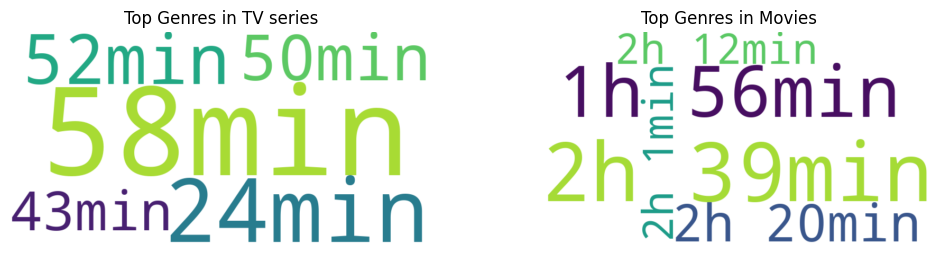

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating a word cloud for TV series genres
wordcloud_series = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres_series)

# Generating a word cloud for Movie genres
wordcloud_movies = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_genres_movies)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_series, interpolation='bilinear')
plt.title('Top Genres in TV series')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres in Movies')
plt.axis('off')

plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
top_platform_movies = movies_df['Streaming Service'].value_counts().reset_index()
top_platform_movies.columns = ['Streaming Service', 'Number of Movies']

top_platform_series = series_df['Streaming Service'].value_counts().reset_index()
top_platform_series.columns = ['Streaming Service', 'Number of TV Shows']

top_platform_movies.head()

top_platform_series.head()


,Streaming Service,Number of TV Shows
0,Netflix,16
1,Amazon Prime Video,11
2,Jio Cinema,9
3,Sony Liv,3
4,N/A,3


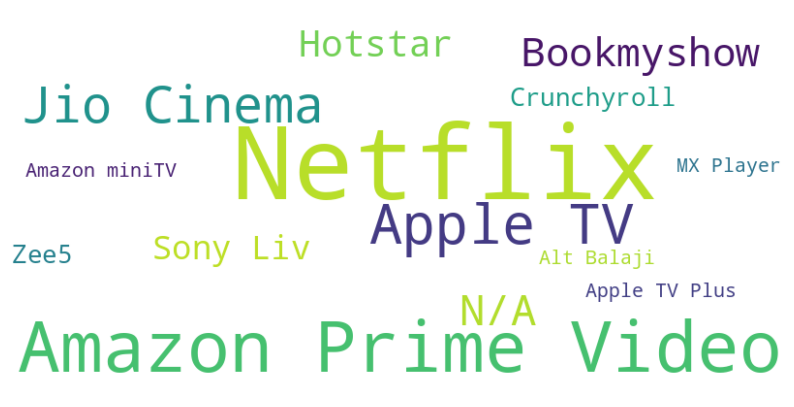

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_platforms = pd.concat([movies_df['Streaming Service'], series_df['Streaming Service']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_platforms.value_counts())
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movies_df.to_csv('Final_Data_of_Movies.csv', index=False)
series_df.to_csv('Final_Data_of_TV_Shows.csv', index=False)

print('Data of Movies saved as Final_Data_of_Movies.csv')
print('Data of TV Shows saved as Final_Data_of_TV_Shows.csv')


Data of Movies saved as Final_Data_of_Movies.csv
Data of TV Shows saved as Final_Data_of_TV_Shows.csv


In [ ]:
#saving filter data as Filter Data in csv format
filtered_movies.to_csv('Filtered_data_of_Movies.csv', index=False)
filtered_series.to_csv('Filtered_data_of_TV_Shows.csv', index=False)

print('Filtered data for movies saved successfully.')
print('Filtered data for TV shows saved successfully.')


Filtered data for movies saved successfully.
Filtered data for TV shows saved successfully.


# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***